In [1]:
import msprime, pyslim
import tskit
import json
import numpy as np
from matplotlib import pyplot as plt

ts = pyslim.load("./spatial.trees")


In [2]:
print(ts)

╔════════════════════════╗
║TreeSequence            ║
╠═══════════════╤════════╣
║Trees          │       1║
╟───────────────┼────────╢
║Sequence Length│100000.0║
╟───────────────┼────────╢
║Sample Nodes   │      40║
╟───────────────┼────────╢
║Total Size     │50.8 KiB║
╚═══════════════╧════════╝
╔═══════════╤════╤════════╤════════════╗
║Table      │Rows│Size    │Has Metadata║
╠═══════════╪════╪════════╪════════════╣
║Edges      │ 330│ 9.0 KiB│          No║
╟───────────┼────┼────────┼────────────╢
║Individuals│ 288│19.5 KiB│         Yes║
╟───────────┼────┼────────┼────────────╢
║Migrations │   0│ 4 Bytes│          No║
╟───────────┼────┼────────┼────────────╢
║Mutations  │   0│ 1.2 KiB│          No║
╟───────────┼────┼────────┼────────────╢
║Nodes      │ 331│11.7 KiB│         Yes║
╟───────────┼────┼────────┼────────────╢
║Populations│   2│ 2.8 KiB│         Yes║
╟───────────┼────┼────────┼────────────╢
║Provenances│   1│ 2.4 KiB│          No║
╟───────────┼────┼────────┼────────────╢
║Sites

In [3]:
# Trace the path of each currently alive individual backward in time and record the location of the ancestor
# Return (time, x)
inds = ts.individuals_alive_at(0)
# Nodes (genomes) of current individuals
nodes = np.concatenate([ts.individual(i).nodes for i in inds])
# Times of nodes
node_times = ts.tables.nodes.time
# Individual corresponding to each node
node_indivs = ts.tables.nodes.individual
# Locations of individuals
locs = ts.individual_locations
paths = []
tree = ts.first()
for u in nodes:
    uind = node_indivs[u]
    out = [[node_times[u], locs[uind, 0]]]
    u = tree.parent(u)
    while u is not tskit.NULL:
        uind = node_indivs[u]
        out.append([node_times[u], locs[uind, 0]])
        u = tree.parent(u)
    paths.append(np.row_stack(out))
# Each element of paths is the lineage of one current individual

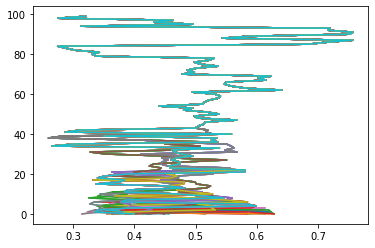

In [4]:
# Plot lineage locations over time
for path in paths:
    plt.plot(path[:,1], path[:,0])